### Introduction to Math for DS Personal Assignnment


#### 1.1 Modelling Bird Population Decline Due to Invasive Snakes

In [1]:
import sympy

# Define symbolic variable
t = sympy.symbols('t')

# Define constants
# Define the maximum capacity A, the value of k, and the invasion time
A = 1000  # Maximum capacity, representing the initial bird population before snake invasion
k = 0.1  # You may need to adjust this value based on your data or observations

# Define the function
P = A * sympy.exp(-k * t**2)

# Calculate the derivative with resympyect to t
P_derivative = sympy.diff(P, t)

# Print the elegant mathematical expression
P_derivative

-200.0*t*exp(-0.1*t**2)

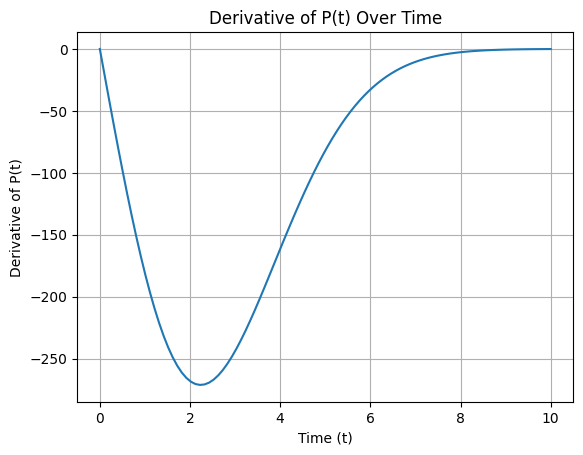

In [2]:
import numpy
import matplotlib.pyplot as plt

# Convert the SymPy expression to a computable NumPy function
P_derivative_func = sympy.lambdify(t, P_derivative, 'numpy')

# Generate a time range
t_values = numpy.linspace(0, 10, 100)

# Calculate the values of the derivative function over the time range
derivative_values = P_derivative_func(t_values)

# Plot the derivative function
plt.plot(t_values, derivative_values)
plt.xlabel("Time (t)")
plt.ylabel("Derivative of P(t)")
plt.title("Derivative of P(t) Over Time")
plt.grid(True)
plt.show()

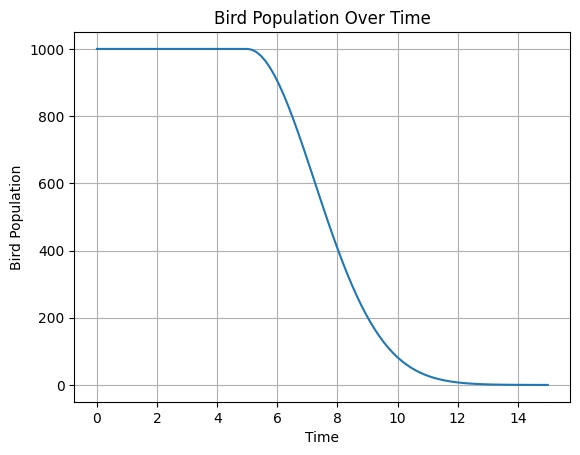

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
import numpy as np

def bird_population_model(t, A, k, invade_time):
    P = np.zeros_like(t)  # Initialize the population array

    for i in range(len(t)):
        if t[i] < invade_time:
            P[i] = A  # Bird population remains constant before invasion
        else:
            P[i] = A * np.exp(-k * (t[i] - invade_time)**2)

    return P


invade_time = 5  # Time of snake invasion

# Generate a time range for plotting
t = np.linspace(0, 15, 100)  # Adjust the time range as needed

# Calculate the population over time
P = bird_population_model(t, A, k, invade_time)

# Plot the population over time
plt.plot(t, P)
plt.xlabel("Time")
plt.ylabel("Bird Population")
plt.title("Bird Population Over Time")
plt.grid(True)
plt.show()

#### 1.2 Seasonal Epidemiological Models

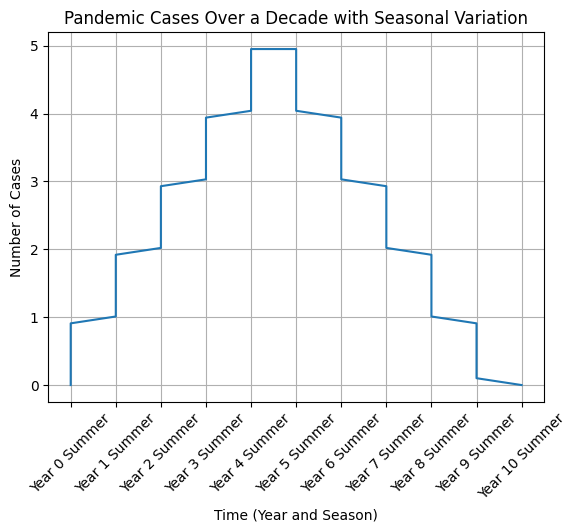

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def pandemic_model(t):
    # Define the peak year and the duration of the pandemic
    peak_year = 5
    duration = 10

    # Calculate the number of cases based on the given conditions
    cases = np.zeros_like(t)
    for i in range(len(t)):
        year = int(t[i])
        if 0 <= year < peak_year:
            cases[i] = (year + t[i] - year) / peak_year * (duration / 2)
        elif peak_year <= year < peak_year + duration / 2:
            cases[i] = (1 - (year + t[i] - year - peak_year) / (duration / 2)) * (duration / 2)

    return cases

# Generate a time range for plotting (a decade)
t = np.linspace(0, 10, 100)

# Calculate the number of cases over the decade
cases = pandemic_model(t)

# Create custom labels for x-axis to represent summer and winter
x_labels = [f'Year {int(year)} {"Summer" if int(year) % 1 == 0 else "Winter"}' for year in t]

# Plot the number of cases over time
plt.plot(x_labels, cases)
plt.xlabel("Time (Year and Season)")
plt.ylabel("Number of Cases")
plt.title("Pandemic Cases Over a Decade with Seasonal Variation")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


#### 4.1 Gradient Descent from (2, 4) for F(x, y)

In [1]:
import sympy as sp
x, y = sp.symbols('x y')
F = x**2 + y**2 - 6*sp.sin(x - y)

partial_x = sp.diff(F, x)
partial_y = sp.diff(F, y)


print("Partial derivative with respect to x:", partial_x)
print("Partial derivative with respect to y:", partial_y)

Partial derivative with respect to x: 2*x - 6*cos(x - y)
Partial derivative with respect to y: 2*y + 6*cos(x - y)


In [2]:
partial_x

2*x - 6*cos(x - y)

In [3]:
partial_y

2*y + 6*cos(x - y)

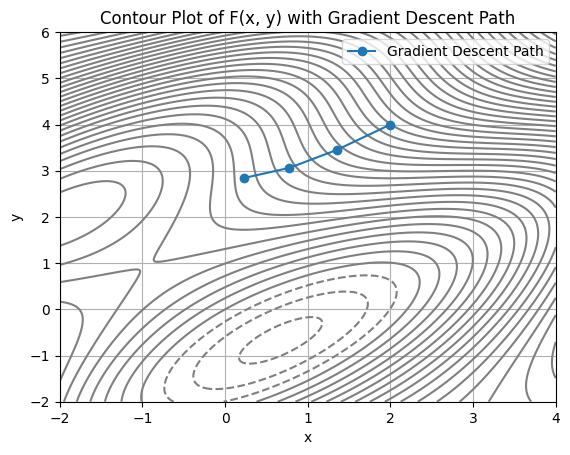

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function F(x, y)
F = x**2 + y**2 - 6*sp.sin(x - y)

# Initialize the starting point
x_current, y_current = 2, 4

# Choose the step size parameter
alpha = 0.1  # You can try different values

# Create lists to store the trajectory
x_trajectory = [x_current]
y_trajectory = [y_current]

# Iterate for gradient descent
for step in range(3):
    # Calculate the gradient
    gradient_x = sp.diff(F, x).subs({x: x_current, y: y_current})
    gradient_y = sp.diff(F, y).subs({x: x_current, y: y_current})

    # Update the point
    x_current -= alpha * gradient_x
    y_current -= alpha * gradient_y

    # Add to the trajectory lists
    x_trajectory.append(x_current)
    y_trajectory.append(y_current)

# Create a contour plot
x_vals = np.linspace(-2, 4, 400)
y_vals = np.linspace(-2, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2 - 6*np.sin(X - Y)
plt.contour(X, Y, Z, levels=50, colors='gray')
plt.plot(x_trajectory, y_trajectory, marker='o', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of F(x, y) with Gradient Descent Path')
plt.legend()
plt.grid(True)
plt.show()